In [12]:
import pandas as pd
import seaborn as sb
import os
os.chdir('/Users/cedeveau/Downloads')

In [2]:
data19 = pd.read_excel('2019Tournament.xlsx', header=1)
data18 = pd.read_excel('2018Tournament.xlsx', header=1)
data17 = pd.read_excel('2017Tournament.xlsx', header=1)
data16 = pd.read_excel('2016Tournament.xlsx', header=1)
data15 = pd.read_excel('2015Tournament.xlsx', header=1)
data14 = pd.read_excel('2014Tournament.xlsx', header=1)
data13 = pd.read_excel('2013Tournament.xlsx', header=1)
data12 = pd.read_excel('2012Tournament.xlsx', header=1)
data11 = pd.read_excel('2011Tournament.xlsx', header=1)
data10 = pd.read_excel('2010Tournament.xlsx', header=1)

In [3]:
data19opp = pd.read_excel('2019Tournament_opp.xlsx', header=1)
data18opp = pd.read_excel('2018Tournament_opp.xlsx', header=1)
data17opp = pd.read_excel('2017Tournament_opp.xlsx', header=1)
data16opp = pd.read_excel('2016Tournament_opp.xlsx', header=1)
data15opp = pd.read_excel('2015Tournament_opp.xlsx', header=1)
data14opp = pd.read_excel('2014Tournament_opp.xlsx', header=1)
data13opp = pd.read_excel('2013Tournament_opp.xlsx', header=1)
data12opp = pd.read_excel('2012Tournament_opp.xlsx', header=1)
data11opp = pd.read_excel('2011Tournament_opp.xlsx', header=1)
data10opp = pd.read_excel('2010Tournament_opp.xlsx', header=1)

In [4]:
df1 = [data19, data18, data17, data16, data15, data14, data13, data12, data11, data10]
df2 = [data19opp, data18opp, data17opp, data16opp, data15opp, data14opp, data13opp, data12opp, data11opp, data10opp]

In [5]:
df = pd.concat(df1, ignore_index=True, sort=False)
df.shape

(3478, 34)

In [6]:
dfopp = pd.concat(df2, ignore_index=True, sort=False)
dfopp.shape

(3478, 34)

In [7]:
df3 = df[df['School'].str.contains('NCAA')]
df3['School'] = df['School'].str.replace('NCAA','')

/Users/cedeveau/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
df3opp = dfopp[dfopp['School'].str.contains('NCAA')]
df3opp['School'] = dfopp['School'].str.replace('NCAA', '')

/Users/cedeveau/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
labels = ['Rk','School','G','W','L','W-L%','SOS','SRS','W.1','L.1','W.2','L.2','W.3','L.3','MP','FG','FGA','3P','3PA','FT','FTA','Unnamed: 16','Tm.','Opp.']
df3opp = df3opp.drop(labels, axis=1)
dict = {'FG%':'FG%O', '3P%':'3P%O','FT%':'FT%O','ORB':'ORBO','TRB':'TRBO','AST':'ASTO','STL':'STLO','BLK':'BLKO','TOV':'TOVO','PF':'PFO'}
df3opp = df3opp.rename(columns=dict)

In [10]:
labels = ['Rk','G','W','L','SRS','W.1','L.1','W.2','L.2','W.3','L.3','MP','FG','FGA','3P','3PA','FT','FTA','Unnamed: 16']
df3 = df3.drop(labels, axis=1)

In [11]:
ncaa = df3.join(df3opp, how='left')

In [13]:
# ncaa.to_excel('NCAA.xlsx')
ncaa = pd.read_excel('NCAA.xlsx')

In [14]:
X = ncaa.iloc[:, 1:-1]
y = ncaa.Label
y.unique()

array([64,  4, 32,  8, 16,  0,  2,  1])

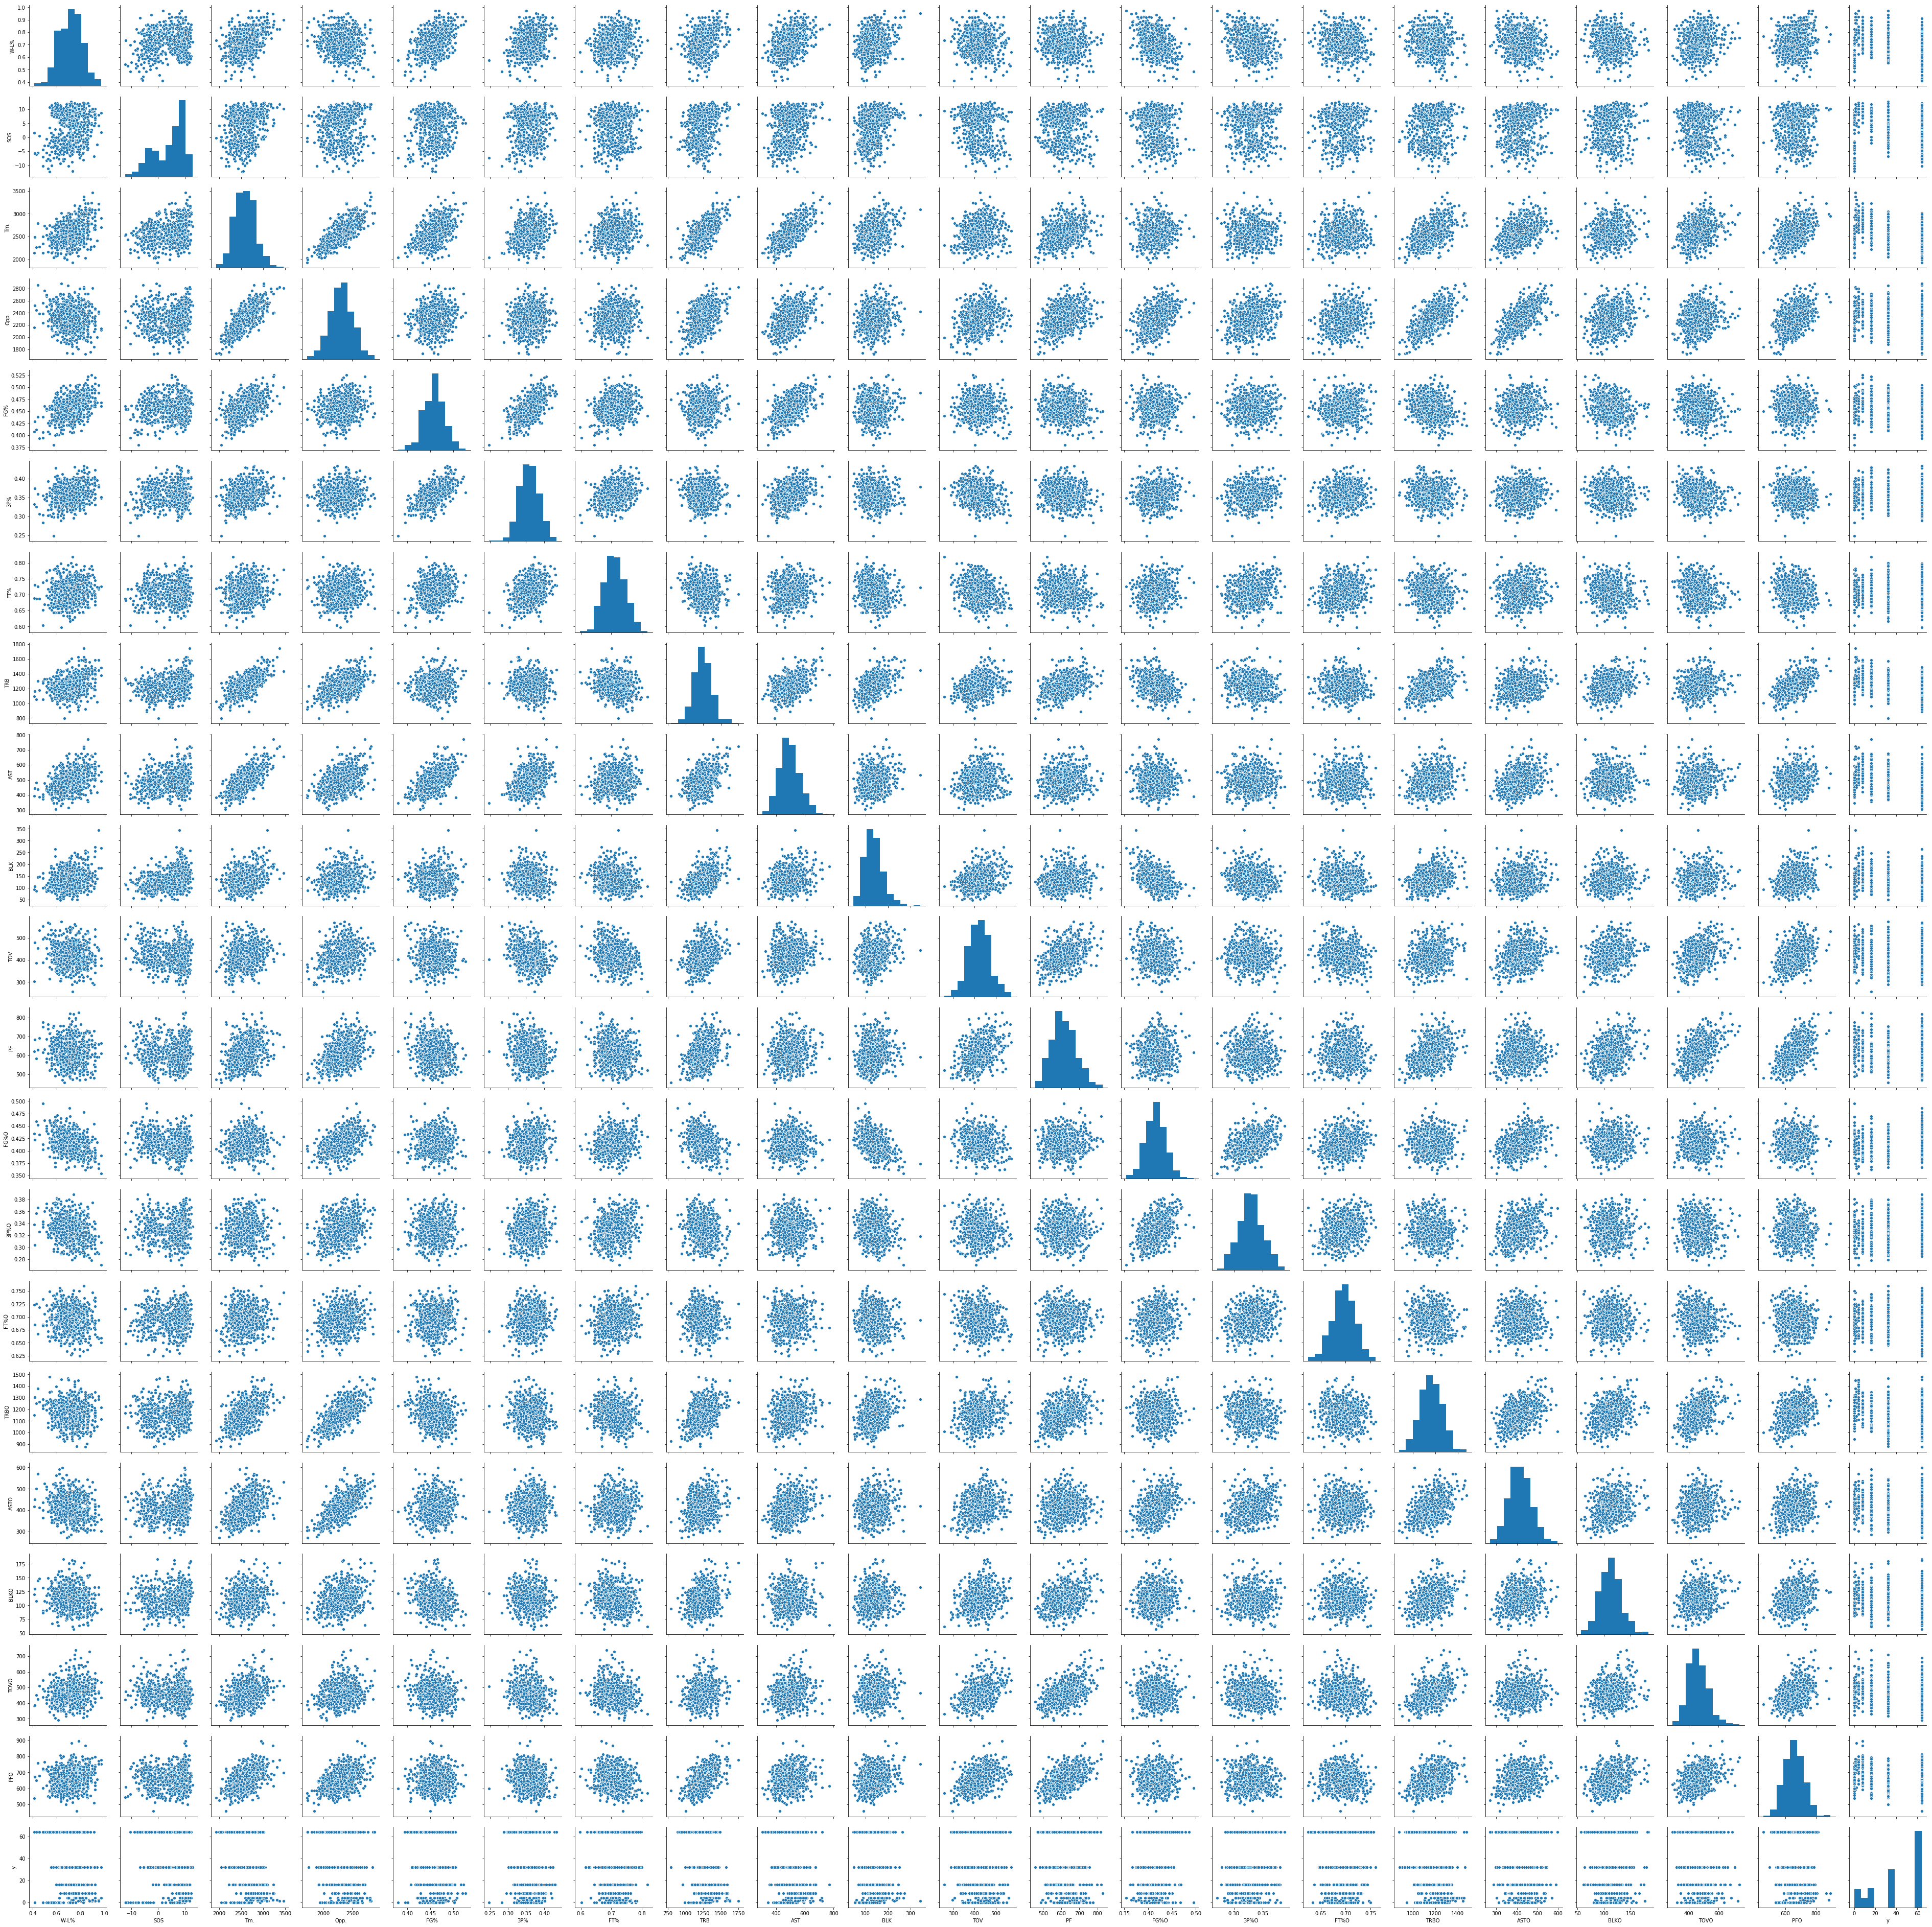

In [15]:
%matplotlib inline

d = pd.DataFrame(X)
d['y'] = pd.Series(y)
sb.pairplot(d)

In [17]:
# X = X.drop(['STL', 'STLO', 'ORB', 'ORBO'], axis=1)

In [18]:
from sklearn.preprocessing import MinMaxScaler 
scale = MinMaxScaler()

X_minmax = pd.DataFrame(scale.fit_transform(X))

/Users/cedeveau/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X))

/Users/cedeveau/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/cedeveau/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y)

In [26]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
print(accuracy_score(y_test, knn.predict(X_test)))

0.6225490196078431


In [51]:
from sklearn.svm import SVC

svc = SVC(gamma='auto', kernel='linear', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8970588235294118


In [27]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(loss = 'modified_huber', penalty ='l1')
sgdc.fit(X_train, y_train)
y_pred = sgdc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7156862745098039


/Users/cedeveau/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [32]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 120, random_state=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9411764705882353


In [47]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Hyperparameter optimization:

# (Hyper)parameter grid
p_grid = {
    "n_estimators": [100, 110, 120, 130, 140, 150]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
g = GridSearchCV(rf, p_grid, cv=cv)

g.fit(X, y)
best = g.best_params_
print(best)

{'n_estimators': 120}


In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [52]:
# One Function to import and clean


def clean_excel(file1:str, file2:str):
    ''' Imports the test data
        Cleans and preprocesses the dataframes
        Arguments:
            file1 = name of excel file as a string
            file2 = name of excel file as a string'''
    df = pd.read_excel(file1, header=1)
    df2 = pd.read_excel(file2, header=1)

    # Select Tournament teams
    df = df[df['School'].str.contains('NCAA')]
    df['School'] = df['School'].str.replace('NCAA','')
    df2 = df2[df2['School'].str.contains('NCAA')]
    df2['School'] =df2['School'].str.replace('NCAA','')

    # Remove unwanted columns
    labels = ['Rk', 'G', 'W', 'L', 'SRS', 'W.1', 'L.1', 'W.2',
              'L.2', 'W.3', 'L.3', 'MP', 'FG', 'FGA', '3P', '3PA',
              'FT', 'FTA', 'Unnamed: 16', 'ORB', 'STL']
    df = df.drop(labels, axis=1)
    labels = ['Rk', 'School', 'G', 'W', 'L', 'W-L%', 'SOS', 'SRS', 'W.1', 'L.1',
                'W.2', 'L.2', 'W.3', 'L.3', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT',
                'FTA', 'Unnamed: 16', 'Tm.', 'Opp.', 'ORB', 'STL']
    df2 = df2.drop(labels, axis=1)

    # Change column names
    dict = {'FG%': 'FG%O', '3P%': '3P%O', 'FT%': 'FT%O', 'TRB': 'TRBO', 'AST': 'ASTO',
            'BLK': 'BLKO', 'TOV': 'TOVO', 'PF': 'PFO'}
    df2 = df2.rename(columns=dict)

    # Join the dataframes
    df_test = df.join(df2, how='left')

    return df_test


In [72]:
# Second Function to apply the model


def predict_rounds(df_test, output, model_type, name = None, train_file = 'NCAA.xlsx'):
    ''' Creates and runs model
        Returns either the probabilities or the prediction
        Arguments:
            df_test = the file made from clean_excel
            train_file = default is NCAA.xlsx - file precleaned for this model
            output = what you want returned, 'prob' = probabilities, 'pred' = prediction
            model_type = either SVC ('svc') or RandomForestClassifier ('rfc')
            name = option to return only one name from the test file'''
    # read in the train_file and set X, y
    train = pd.read_excel(train_file)
    X = train.iloc[:, 1:-1]
    y = train.Label

    # set X_test and names variable
    names = df_test
    names['School'] = df_test['School'].str.replace('\xa0', '')
    name_index = names[['School']].reset_index(drop=True)
    if name in names.School.unique():
        row = pd.DataFrame(names[names.School == name])
        X_test = row.iloc[:, 1:]
    elif name not in names.School.unique() and name != None:
        X_test = df_test.iloc[:, 1:]
        print('Sorry that school did not make the tournament. Here are model results for the schools that did.')
    elif name == None:
        X_test = df_test.iloc[:, 1:]

    # Pipeline with scaler and RFC
    if model_type == 'rfc':
        steps = [('scaler', StandardScaler()),
             ('RFC', RandomForestClassifier(n_estimators=120, random_state=5))]
        pipeline = Pipeline(steps)
        model = pipeline.fit(X, y) 
        
    if model_type == 'svc':
        steps = [('scaler', StandardScaler()),
             ('SVC', SVC(gamma='auto', kernel='linear', probability=True))]
        pipeline = Pipeline(steps)
        model = pipeline.fit(X, y)   
        
    # ## Return probabilities or Return labels only
    if output == 'prob':
        probs = pd.DataFrame(model.predict_proba(X_test))
        probs.columns = model.classes_
        if name != None and name in names.School.unique():
            statement = '{name}: '.format(name=name)+str(probs)
            return statement
        else:
            probs = name_index.join(probs, how='left')
            return probs
    if output == 'pred':
        preds = model.predict(X_test)
        if name != None and name in names.School.unique():
            statement = '{name}: '.format(name=name) + str(preds)
            return statement
        else:
            preds = pd.DataFrame(preds)
            preds = name_index.join(preds, how='left')
            preds.columns = ['School', 'Round']
            return preds

In [79]:
test = clean_excel('2018Tournament.xlsx', '2018Tournament_opp.xlsx')
preds = predict_rounds(df_test = test, output = 'pred', model_type = 'svc')
print(preds)


/Users/cedeveau/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/cedeveau/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/cedeveau/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


                       School  Round
0                     Alabama     64
1               Arizona State     64
2                     Arizona     32
3                    Arkansas     64
4                      Auburn     32
5                    Bucknell     64
6                     Buffalo     64
7                      Butler     64
8         Cal State Fullerton     64
9                  Cincinnati     32
10                    Clemson     32
11      College of Charleston     64
12                  Creighton     64
13                   Davidson     64
14                       Duke      8
15              Florida State     64
16                    Florida     64
17              Georgia State     64
18                    Gonzaga     16
19                    Houston     32
20                       Iona     64
21               Kansas State     32
22                     Kansas      8
23                   Kentucky      8
24                   Lipscomb     64
25     Long Island University     64
2